# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [243]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [244]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
head=app_train.head()
head

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [246]:
app_train['AMT_INCOME_TOTAL'].mean(),app_train['AMT_CREDIT'].std()

(168797.9192969845, 402490.776995946)

#### GroupBy for female 

In [247]:
gender=app_train.groupby("CODE_GENDER")
female=gender.get_group("F")
female.columns
np.where(female.columns=="AMT_INCOME_TOTAL")[0][0]


7

In [248]:
female.iloc[:,np.where(female.columns=="AMT_INCOME_TOTAL")[0][0]]=female["AMT_INCOME_TOTAL"]
female.head()
income_female=pd.concat([female['SK_ID_CURR'],female['AMT_INCOME_TOTAL']],axis=1)
income_female=income_female["AMT_INCOME_TOTAL"]
income_female=pd.concat([income_female,female['AMT_CREDIT']],axis=1)
income_female.head()

,AMT_INCOME_TOTAL,AMT_CREDIT
1,270000.0,1293502.5
3,135000.0,312682.5
6,171000.0,1560726.0
8,112500.0,1019610.0
10,112500.0,652500.0


#### GroupBy for Male

In [249]:
male=gender.get_group("M")
male.iloc[:,np.where(male.columns=="AMT_INCOME_TOTAL")[0][0]]=male["AMT_INCOME_TOTAL"]
income_male=pd.concat([male['SK_ID_CURR'],male['AMT_INCOME_TOTAL']],axis=1)
income_male=income_male["AMT_INCOME_TOTAL"]
income_male=pd.concat([income_male,male['AMT_CREDIT']],axis=1)
income_male.head()

,AMT_INCOME_TOTAL,AMT_CREDIT
0,202500.0,406597.5
2,67500.0,135000.0
4,121500.0,513000.0
5,99000.0,490495.5
7,360000.0,1530000.0


#### GroupBy for novalue

In [250]:
no=gender.get_group(pd.unique(app_train["CODE_GENDER"])[2])
no.iloc[:,np.where(no.columns=="AMT_INCOME_TOTAL")[0][0]]=no["AMT_INCOME_TOTAL"]
no.head()
income_novalue=pd.concat([no['SK_ID_CURR'],no['AMT_INCOME_TOTAL']],axis=1)
income_novalue=income_novalue["AMT_INCOME_TOTAL"]
income_novalue=income_male["AMT_INCOME_TOTAL"]
income_novalue=pd.concat([income_novalue,no['AMT_CREDIT']],axis=1)
income_novalue.head()
income_novalue=income_novalue.fillna(0)
#檢查正數有幾個
(income_novalue>0).sum()
#檢查這些數是否全部都為True
income_novalue.all()#如果要看有沒有True的話用.any()
income_novalue

,AMT_INCOME_TOTAL,AMT_CREDIT
0,202500.0,0.0
2,67500.0,0.0
4,121500.0,0.0
5,99000.0,0.0
7,360000.0,0.0
...,...,...
307492,585000.0,0.0
307494,270000.0,0.0
307495,180000.0,0.0
307498,198000.0,0.0


In [251]:
income=pd.concat([income_male,income_female,income_novalue],axis=1)
income.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_CREDIT
0,202500.0,406597.5,NaN,NaN,202500.0,0.0
1,NaN,NaN,270000.0,1293502.5,NaN,NaN
2,67500.0,135000.0,NaN,NaN,67500.0,0.0
3,NaN,NaN,135000.0,312682.5,NaN,NaN
4,121500.0,513000.0,NaN,NaN,121500.0,0.0


In [252]:
income=income.fillna(0)


In [253]:
# income['male']=income['male'].cumsum(0)
# income['female']=income['female'].cumsum(0)
# income['Nan']=income['Nan'].cumsum(0)
income=income.cumsum(0)
income.columns=["male_INCOME","male_CREDIT","female_INCOME","female_CREDIT","Nan_INCOME","Nan_CREDIT"]
income.head()
income=income.iloc[[-1]]
income.index=["Income_Kind"]

In [254]:
income=np.array(income)
income=income.flatten().reshape(3,2)
income=pd.DataFrame(income,columns=["INCOME","CREDIT"],index=pd.Index(["male","female","Nan"]))
income

,INCOME,CREDIT
male,2.031804e+10,6.420105e+10
female,3.158843e+10,1.200044e+11
Nan,2.031804e+10,1.597500e+06


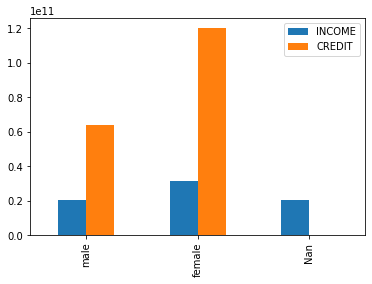

In [255]:
income.plot(kind="bar")

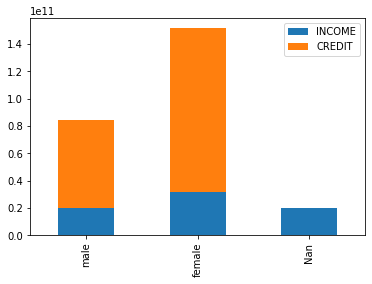

In [256]:
income.plot(kind="bar",stacked=True)

In [257]:
Income=pd.Series(np.array(income["INCOME"]),index=["male","female","Nan"],name="Income")

In [258]:
Credit=pd.Series(np.array(income["CREDIT"]),index=["male","female","Nan"],name="Credit")

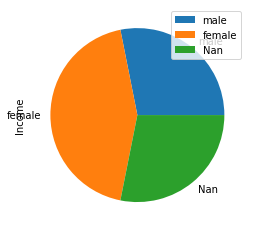

In [269]:
Income.plot.pie(legend="best")

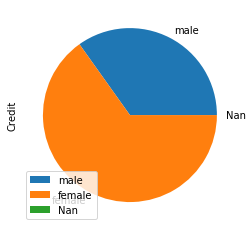

In [260]:
Credit.plot.pie(legend="best")

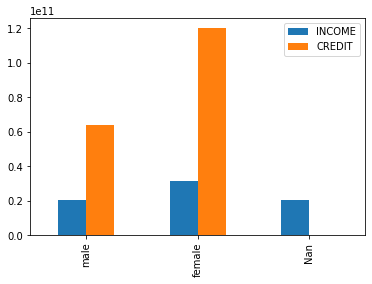

In [261]:
income.plot(kind="bar")

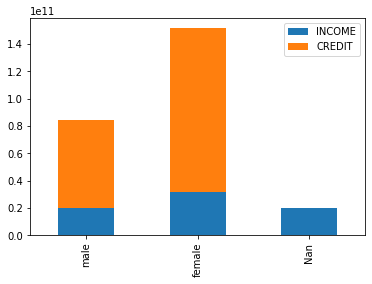

In [262]:
income.plot(kind="bar",stacked=True)

CODE_GENDER
F      AxesSubplot(0.125,0.125;0.775x0.755)
M      AxesSubplot(0.125,0.125;0.775x0.755)
XNA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

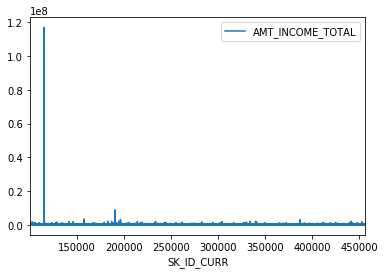

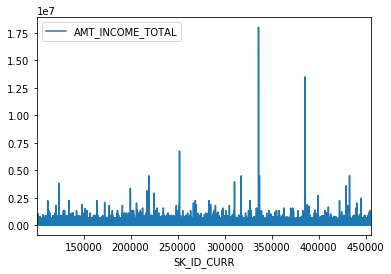

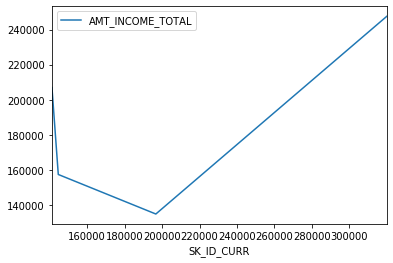

In [263]:
gender.plot(x='SK_ID_CURR',y='AMT_INCOME_TOTAL')

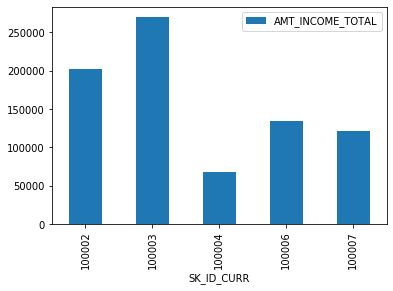

In [264]:
import matplotlib.pyplot as plt
new=pd.DataFrame({'AMT_INCOME_TOTAL':head['AMT_INCOME_TOTAL']})

new.index=list(head['SK_ID_CURR'])
new['SK_ID_CURR']=new.index
new.index=range(new['SK_ID_CURR'].shape[0])

new.plot(kind="bar",legend=True,x=new.columns[1],y=new.columns[0])




#new.hist(bins=100,xlabelsize=14,ylabelsize=14)

In [265]:
# new.hist(bins=100,xlabelsize=14,ylabelsize=14)
# plt.xlabel("SK_ID_CURR",fontsize=16)
# plt.ylabel("AMT_INCOME_TOTAL",fontsize=16)
# plt.xlim(head["SK_ID_CURR"])